In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("./datasetes/credit/creditcard.csv", low_memory=False)
# df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,58629.0,1.139019,-0.101769,-0.314982,-0.164350,0.101287,-0.475595,0.374976,-0.188015,-0.403314,...,-0.381686,-1.353538,0.003406,-0.462444,0.173834,0.643981,-0.117927,0.002798,99.00,0
1,153871.0,-1.108319,-0.479091,-0.281801,3.834887,-2.023660,0.878587,2.494906,0.301339,-1.290925,...,0.291691,-0.428286,2.302506,0.248074,-2.318195,-0.836501,0.035182,0.377635,679.30,0
2,9729.0,-1.711793,1.044837,1.932781,-0.429021,-0.338586,0.389833,-0.259721,-0.805283,2.269503,...,0.709299,0.368781,-0.020931,0.237244,-0.333658,1.007750,-0.073077,0.224735,9.28,0
3,70345.0,1.364579,-0.145144,0.385800,-0.462098,-0.965326,-1.344922,-0.381015,-0.307561,-1.051317,...,-0.106377,-0.356193,0.135920,0.645943,0.237526,-0.505061,0.031222,0.051050,15.00,0
4,70014.0,0.852605,-0.709105,0.554433,1.164843,-0.591098,0.767108,-0.511294,0.297263,0.666478,...,0.197745,0.252608,-0.394173,-0.839627,0.530687,-0.203352,0.021558,0.043489,188.00,0


In [6]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


In [7]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [6]:
x1 = df.loc[df['Class'] == 1].shape[0]
y1 = df.loc[df['Class'] == 0].shape[0]
x1, y1

(492, 284315)

In [16]:
df = pd.read_csv("./datasetes/credit/creditcard.csv", low_memory=False)
# df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
df.head()
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=500)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

We have 492 fraud data points and 284315 nonfraudulent data points.
X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 182 0.0018257877471584924
Number of frauds on y_train: 310 0.0016745532724012013


In [17]:
train_pd = pd.DataFrame(X_test, columns=['x'+str(i) for i in range(30)])
train_pd['y'] = y_test
train_pd.to_csv("./datasetes/credit/credit_test.csv", index=False)

In [18]:
train_pd = pd.DataFrame(X_train, columns=['x'+str(i) for i in range(30)])
train_pd['y'] = y_train
train_pd.to_csv("./datasetes/credit/credit_train.csv", index=False)

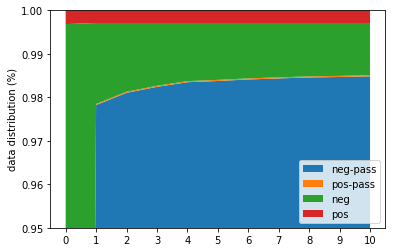

In [13]:
import numpy as np
import matplotlib.pyplot as plt

y1 = [0, 97821, 98103, 98240, 98347, 98375, 98410, 98434, 98456, 98467, 98482, 98493, 98504, 98515, 98521, 98532, 98533, 98534, 98536, 98545, 98552, 98552, 98557, 98570, 98572, 98576, 98583, 98584, 98590, 98591, 98598, 98599, 98602, 98604, 98604, 98609, 98612, 98614, 98614, 98614, 98617, 98618, 98620, 98623, 98625, 98628, 98629, 98630, 98630]
y2 = [0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
y3 = [99683, 1862, 1580, 1443, 1336, 1308, 1273, 1249, 1227, 1216, 1201, 1190, 1179, 1168, 1162, 1151, 1150, 1149, 1147, 1138, 1131, 1131, 1126, 1113, 1111, 1107, 1100, 1099, 1093, 1092, 1085, 1084, 1081, 1079, 1079, 1074, 1071, 1069, 1069, 1069, 1066, 1065, 1063, 1060, 1058, 1055, 1054, 1053, 1053]
y4 = [316, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291]
# y1 = [i*100 / (99683+316) for i in y1]
# y2 = [i*100 / (99683+316) for i in y2]
# y3 = [i*100 / (99683+316) for i in y3]
# y4 = [i*100 / (99683+316) for i in y4]
y1 = [i*1 / (99683+316) for i in y1]
y2 = [i*1 / (99683+316) for i in y2]
y3 = [i*1 / (99683+316) for i in y3]
y4 = [i*1 / (99683+316) for i in y4]
x = list(range(0, len(y1)+1))

y = np.vstack([y1, y2, y3, y4])

labels = ["neg-pass", "pos-pass", "neg", "pos"]

fig, ax = plt.subplots()
# print(x[:10])
ax.stackplot(x[:11], y1[:11], y2[:11], y3[:11], y4[:11], labels=labels)
ax.legend(loc=4)
# plt.ylim(99367-2000, 100000)
# plt.ylim(95, 100)
plt.ylim(0.95, 1)
plt.xticks(range(11))
plt.savefig("./logs/images/stack_plot-0421.pdf", bbox_inches='tight')
# plt.xlabel("iteration")
plt.ylabel("data distribution (%)")
plt.show()

# fig, ax = plt.subplots()
# ax.stackplot(x, y)
# plt.show()

In [ ]:
##Stacked training data distribution in each iteration. The red and green areas indicate the proportion of the positive and negative cases of the retained data (hard examples) during each iteration, while the yellow and blue areas indicate the proportion of the positive and negative cases of the filtered data (easy examples) during each iteration.

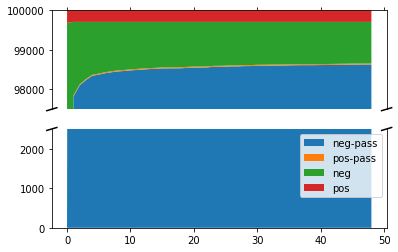

In [65]:
import numpy as np
import matplotlib.pyplot as plt

y1 = [0, 97821, 98103, 98240, 98347, 98375, 98410, 98434, 98456, 98467, 98482, 98493, 98504, 98515, 98521, 98532, 98533, 98534, 98536, 98545, 98552, 98552, 98557, 98570, 98572, 98576, 98583, 98584, 98590, 98591, 98598, 98599, 98602, 98604, 98604, 98609, 98612, 98614, 98614, 98614, 98617, 98618, 98620, 98623, 98625, 98628, 98629, 98630, 98630]
y2 = [0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
y3 = [99683, 1862, 1580, 1443, 1336, 1308, 1273, 1249, 1227, 1216, 1201, 1190, 1179, 1168, 1162, 1151, 1150, 1149, 1147, 1138, 1131, 1131, 1126, 1113, 1111, 1107, 1100, 1099, 1093, 1092, 1085, 1084, 1081, 1079, 1079, 1074, 1071, 1069, 1069, 1069, 1066, 1065, 1063, 1060, 1058, 1055, 1054, 1053, 1053]
y4 = [316, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291]
x = list(range(len(y1)))

y = np.vstack([y1, y2, y3, y4])

labels = ["neg-pass", "pos-pass", "neg", "pos"]

# fig, ax = plt.subplots()
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
# plot the same data on both axes
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax2.stackplot(x, y1, y2, y3, y4, labels=labels)
# zoom-in / limit the view to different portions of the data
ax2.set_ylim(0, 100000-97500)  # outliers only
ax.set_ylim(97500, 100000)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax2.legend()
# plt.ylim(99367-2000, 100000)
plt.savefig("./logs/images/stack_plot_ax.pdf", bbox_inches='tight')
plt.show()

# fig, ax = plt.subplots()
# ax.stackplot(x, y)
# plt.show()

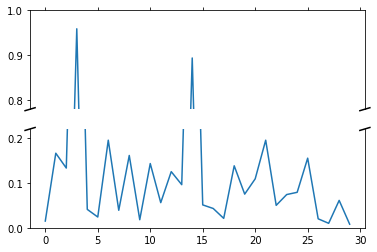

In [48]:
"""
Broken axis example, where the y-axis will have a portion cut out.
"""
import matplotlib.pyplot as plt
import numpy as np


# 30 points between 0 0.2] originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

In [11]:
y

array([[   492,    492],
       [284315, 284315]])

In [1]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=500)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

NameError: name 'df' is not defined

In [15]:
import numpy as np

import EnhancedForest_multiclass
import DecomposerForest
import LogUtils
import AlgorithmUtils
import importlib
importlib.reload(DecomposerForest)
importlib.reload(LogUtils)
importlib.reload(EnhancedForest_multiclass)
importlib.reload(AlgorithmUtils)
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.filterwarnings("ignore")

In [16]:
from sklearn import metrics
def acc_metrix_mult(a, p):
#     print(p)
    return "acc", metrics.accuracy_score(a, p)

In [21]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
decoForest = DecomposerForest.DecomposerForest(X_train, y_train, X_test, y_test, num_class=2, flag="creditcard", isLRStacker=True)
decoForest.set_parameter(criterion="gini", dropout=0.8, min_samples_leaf=10)
decoForest.fit(n_estimators=200, kfold=3, feval=acc_metrix_mult)


2018-01-27 15:02:50 layer: 1


In [23]:
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.99949840995957184,
 [(0, 0.99944825095552903),
  (1, 0.99949840995957184),
  (2, 0.99944825095552903),
  (3, 0.99946831455714613),
  (4, 0.99945828275633763),
  (5, 0.99945828275633763),
  (6, 0.99947834635795474),
  (7, 0.99946831455714613),
  (8, 0.99946831455714613),
  (9, 0.99945828275633763),
  (10, 0.99945828275633763),
  (11, 0.99944825095552903),
  (12, 0.99944825095552903),
  (13, 0.99945828275633763),
  (14, 0.99944825095552903),
  (15, 0.99944825095552903),
  (16, 0.99944825095552903),
  (17, 0.99944825095552903),
  (18, 0.99946831455714613),
  (19, 0.99945828275633763),
  (20, 0.99944825095552903)])

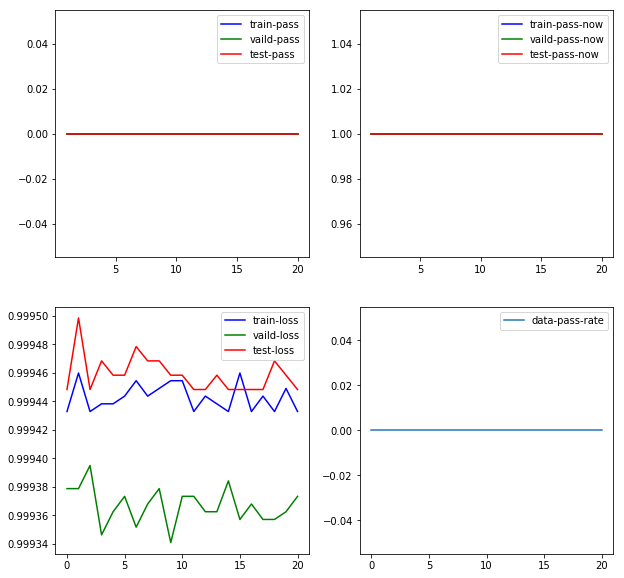

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(decoForest.train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],decoForest.pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],decoForest.pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,decoForest.train_loss_lt, label="train-loss", color="blue")
plt.plot(x,decoForest.vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,decoForest.test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,decoForest.pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()